<a href="https://colab.research.google.com/github/Nikhil-Nandam/TensorFlow-Notebooks/blob/main/08_Introduction_to_NLP_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences, text or speech).

Another common term for NLP Problems is sequence to sequence problems (seq2seq).

In [1]:
!nvidia-smi

Fri Jun 17 12:13:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import a series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-06-17 12:13:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-17 12:13:05 (83.7 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

See the [original source](https://www.kaggle.com/competitions/nlp-getting-started).

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-06-17 12:13:08--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.2’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.003s  

2022-06-17 12:13:08 (166 MB/s) - ‘nlp_getting_started.zip.2’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do so would to us Python.

But it is better to visualize it right away.

So, another way to do this would be through pandas...

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [6]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [7]:
# Shuffle training dataset
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)   # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index + 5].itertuples():
    _, text, target = row
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 1 (real disaster)
Text:
Man charged over fatal crash near Dubbo refused bail http://t.co/HDBMfOVUtZ via @dailyliberal

---

Target: 1 (real disaster)
Text:
#usNWSgov Severe Weather Statement issued August 05 at 10:38PM EDT by NWS: ...THE SEVERE THUNDERSTORM WARNING ... http://t.co/7HuEN4rWrn

---

Target: 0 (not real disaster)
Text:
Great British &lt;b&gt;Bake&lt;/b&gt; Off's back and Dorret's &lt;b&gt;chocolate&lt;/b&gt; gateau collapsed - JANÛ_ http://t.co/53LORsrGqf

---

Target: 1 (real disaster)
Text:
Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR

---

Target: 0 (not real disaster)
Text:
@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears

---



### Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split the training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), 
                                                                            train_df_shuffled["target"].to_numpy(), 
                                                                            random_state=42, 
                                                                            test_size=0.1)    # use 10% of training data for validation split

In [13]:
# Check the lengths 
len(train_sentences), len(train_labels), len(val_sentences), len (val_labels)

(6851, 6851, 762, 762)

In [14]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text Vectorization (Tokenization)

In [15]:
from pandas.core.common import standardize_mapping
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,    # how many words in the vocabulary (automatically add <OOV> (Out of Vocabulary))
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,        # create groups of n-words
                                    output_mode="int",
                                    output_sequence_length=None,    # how long do you want your sequences to be
                                    pad_to_max_tokens=False)

In [16]:
len(train_sentences[0].split())

7

In [17]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [18]:
# Setup text vectorization variables
max_vocab_length = 10000    # max number of words to have in our vocabulary
max_length = 15             # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Lol '@j2bone: *cousin ' @Foxy__Siren: Coursing* '@WEYREY_gidi: Now they are causing Di Maria.. LOL''        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 174,    1, 3082,    1, 5904, 4264,   48,   64,   22, 1426, 1874,
        2392,  174,    0,    0]])>

In [22]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()   # get all of the unique words in the training data
top_5_words = words_in_vocab[:5]        # get the most common words
bottom_5_words = words_in_vocab[-5:]    # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding, we're going to use [TensorFlow's Embedding layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

The parameters we care the most about for our embedding layer:
* `input_dim`: the size of our vocabulary
* `output_dim`: the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length`: length of the sequences being passed to the embedding layer

In [23]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length,   # set the input shape
                      output_dim=128,               # output shape
                      embeddings_initializer="uniform",
                      input_length=max_length)      # how long is each input

embedding        

In [24]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @ByTorrecilla Torrecilla We Always info the Secret on LoL Game Check the Secret to get 600.000 Riot Points on my Bio        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0331565 ,  0.00910596,  0.03291811, ..., -0.03487202,
          0.02054136,  0.00211925],
        [ 0.02751153, -0.00902696,  0.01779623, ..., -0.00533712,
          0.02533081, -0.03337009],
        [ 0.00627832,  0.01572095, -0.01534393, ...,  0.00817104,
         -0.01054256,  0.02482573],
        ...,
        [-0.03269079,  0.01060086, -0.03092731, ..., -0.04448998,
         -0.04387152,  0.00602226],
        [-0.04668921,  0.00191285,  0.00366988, ...,  0.03685763,
          0.00420858,  0.00397582],
        [ 0.04143721,  0.04147332,  0.02020243, ..., -0.04260374,
          0.02744806, -0.02380736]]], dtype=float32)>

In [25]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.0331565 ,  0.00910596,  0.03291811,  0.04054184,  0.04334552,
        -0.04959166, -0.0131714 ,  0.0370106 , -0.02989036,  0.03561472,
         0.04447639,  0.03341767, -0.02254633,  0.00424745, -0.02561845,
         0.03656397, -0.0010624 ,  0.04579452, -0.02344985, -0.0075007 ,
        -0.04083103,  0.02786685, -0.00841653,  0.00379407,  0.00309841,
        -0.02539209,  0.02116448, -0.00453965,  0.04400785,  0.01778257,
        -0.02768174, -0.03535052,  0.03578394,  0.0387018 ,  0.01171802,
         0.02311757,  0.00964879, -0.01124127,  0.02687227, -0.00871966,
        -0.04367039, -0.01701214,  0.00232504,  0.04582598,  0.04391791,
        -0.01272509, -0.01644343, -0.02577651, -0.01085592, -0.04072792,
         0.00327867, -0.00842608, -0.0391098 ,  0.04355932,  0.03536775,
         0.02966041, -0.01938852,  0.01547322, -0.01295453,  0.01666169,
         0.03249006,  0.04854128, -0.00836653,  0.03153502, -0.0156251 ,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.
* Model 0: Naïve Bayes (baseline), this is from [Sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of these?

Use the standard steps in modelling with TensorFlow
* Create a model
* Build the model
* Fit the model
* Evaluate the model

### Model 0: Getting a baseline

As with all Machine Learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll be using Sklearn's Multinomial Naïïve Bayes using the TF_IDF formula to convert our words to numbers.

> 🔑**Note:** It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),   # convert words to numbers using tfidf
    ("clf", MultinomialNB()),       # model the text
])

# Fit the pipeline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score * 100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however this will be cumbersome and could easily be fixed with a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-Score

For more detail on various evaluation metrics refer [Sklearn's Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [29]:
# Funtion to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1-score of a binary classification model.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100

    # Calculate model precision, recall and f1-score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1_score": model_f1}

    return model_results

In [30]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: A Simple Dense Model

In [31]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [32]:
# Build model with the Functional API
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text to numbers
x = embedding(x)    # create an embedding of the numberized inputs
x = GlobalAveragePooling1D(name="global_avg_pool_layer")(x) # condense the feature vector for each token to one vector
outputs = Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation function
model_1 = Model(inputs, outputs, name="model_1_dense")

In [33]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [34]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220617-121311
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.6137 - accuracy: 0.6878 - val_loss: 0.5364 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4408 - accuracy: 0.8190 - val_loss: 0.4697 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3463 - accuracy: 0.8587 - val_loss: 0.4588 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2836 - accuracy: 0.8905 - val_loss: 0.4641 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2365 - accuracy: 0.9150 - val_loss: 0.4823 - val_accuracy: 0.7900


In [36]:
# Check the results 
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7900


[0.48233649134635925, 0.7900262475013733]

In [37]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [38]:
# look at a single prediction
model_1_pred_probs[0]

array([0.34170026], dtype=float32)

In [39]:
# look at the first 10 predictions
model_1_pred_probs[10]

array([0.10757066], dtype=float32)

In [40]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [41]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'f1_score': 0.7864703323847969,
 'precision': 0.7969833282849871,
 'recall': 0.7900262467191601}

In [42]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [43]:
# Looks like our baseline is out performing our first deep learning model...
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Visualizing learned embeddings

In [44]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [45]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [46]:
# Get the weight matrix of the embedding layer
# (these are the numerical representations of each token in out training data, which have been learned for ~5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)  # same size as vocab size and embedding dim (output dim of embedding layer)

(10000, 128)


Now, we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called [Projector](http://projector.tensorflow.org)

And TensorFlow also has an incredible guide on word embeddings themselves. 
https://www.tensorflow.org/text/guide/word_embeddings

In [47]:
# Create embedding files (we got this from TensorFlow's word embedding documentation)
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#     if index == 0:
#         continue  # skip 0, it's padding.
#     vec = embed_weights[index]
#     out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#     out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [48]:
# Download files from Colab to upload to projector
# try:
#     from google.colab import files
#     files.download('vectors.tsv')
#     files.download('metadata.tsv')
# except Exception:
#     pass

Downloading the files above we can visualize them using [Projector](http://projector.tensorflow.org/) and clicking the "load" button on the left hand side.

> 📖 **Resources:** If you'd like to know more about embeddings, check out:
* Jay Alammar's visualized word2vec [post](https://jalammar.github.io/illustrated-word2vec/)
* TensorFlow's Word Embeddings [guide](https://www.tensorflow.org/text/guide/word_embeddings)

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a precious input to aid the representation of a later input.

> 📖 **Resources:** If you want an overview of the internals of a recurrent neural network, see the following:
- [MIT's sequence modelling lecture](https://www.youtube.com/watch?v=qjrad0V0uJE)
- [Chris Olah's intro to LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Andrej Karpathy's the unreasonable effectiveness of recurrent neural networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)
```

In [49]:
# Create an LSTM model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = LSTM(units=64, return_sequences=True)(x)    # when you're stacking RNN cells together, you need to set return_sequences=True
# print(x.shape)
x = LSTM(units=64)(x)
# print(x.shape)
# x = Dense(64, activation="relu")(x)
# print(x.shape)
outputs = Dense(1, activation="sigmoid")(x)

model_2 = Model(inputs, outputs, name="model_2_LSTM")

In [50]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [51]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [52]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220617-121324
Epoch 1/5
215/215 [==============================] - 8s 13ms/step - loss: 0.2257 - accuracy: 0.9188 - val_loss: 0.5602 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1551 - accuracy: 0.9412 - val_loss: 0.6148 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1277 - accuracy: 0.9515 - val_loss: 0.7112 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1049 - accuracy: 0.9607 - val_loss: 0.7835 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0840 - accuracy: 0.9669 - val_loss: 0.8893 - val_accuracy: 0.7782


In [53]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[2.7280722e-03],
       [8.9685792e-01],
       [9.9978226e-01],
       [9.8872408e-02],
       [8.9986861e-04],
       [9.9858862e-01],
       [8.5438782e-01],
       [9.9985254e-01],
       [9.9974257e-01],
       [4.2680517e-01]], dtype=float32)

In [54]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [55]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.82152230971128,
 'f1_score': 0.7757459581978545,
 'precision': 0.7810722984564322,
 'recall': 0.7782152230971129}

In [56]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 3: GRU

Another popular and effective RNN component is the GRU (Gated Recurrent Unit).

The GRU cell has similar features to am LSTM cell but has less parameters.

> 📖 **Resources:** 
 * [Wikipedia's Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit#:~:text=Gated%20recurrent%20units%20(GRUs)%20are,it%20lacks%20an%20output%20gate.)
 * [Towards Data Science's Guide to LSTM’s and GRU’s](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

In [57]:
# Build an RNN using the GRU cell
from tensorflow.keras.layers import Input, GRU, Dense, LSTM, GlobalAveragePooling1D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = GRU(64)(x)
# print(x.shape)
# x = GRU(64, return_sequences=True)(x)   # if you want to stack recurrent layers on top of each other, you need return_sequences=True
# print(x.shape)
# x = LSTM(64, return_sequences=True)(x)
# print(x.shape)
# x = GRU(64)(x)
# x = Dense(64, activation="relu")(x)
# x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation="sigmoid")(x)

model_3 = Model(inputs, outputs, name="model_3_GRU")

In [58]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [59]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [60]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220617-121343
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1569 - accuracy: 0.9432 - val_loss: 0.7521 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0917 - accuracy: 0.9667 - val_loss: 0.7280 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0713 - accuracy: 0.9747 - val_loss: 0.8903 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0659 - accuracy: 0.9745 - val_loss: 0.9352 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0569 - accuracy: 0.9766 - val_loss: 0.9539 - val_accuracy: 0.7782


In [61]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[8.0467714e-03],
       [8.6575621e-01],
       [9.9962294e-01],
       [7.2612494e-02],
       [2.3058937e-04],
       [9.9868709e-01],
       [6.2047017e-01],
       [9.9990559e-01],
       [9.9972981e-01],
       [6.6062403e-01]], dtype=float32)

In [62]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [63]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.82152230971128,
 'f1_score': 0.7758810170952618,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129}

In [64]:
# Looks like our baseline is out performing than our model_3_GRU...
import numpy as np

np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence), however, a bi-directional RNN goes from right to left as well as left to right.

In [65]:
# Build a bidirectional RNN from TensorFlow
from tensorflow.keras.layers import Input, Bidirectional, Dense, LSTM
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = Bidirectional(LSTM(64, return_sequences=True))(x)
# print(x.shape)
x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)

model_4 = Model(inputs, outputs, name="model_4_bidirectional")

In [66]:
# Get a model_summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [67]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [68]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220617-121359
Epoch 1/5
215/215 [==============================] - 10s 19ms/step - loss: 0.1018 - accuracy: 0.9699 - val_loss: 1.0361 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0521 - accuracy: 0.9777 - val_loss: 1.1275 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0450 - accuracy: 0.9801 - val_loss: 1.3268 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0438 - accuracy: 0.9810 - val_loss: 1.4862 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0432 - accuracy: 0.9804 - val_loss: 1.4570 - val_accuracy: 0.7782


In [69]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[2.0828466e-04],
       [8.4297323e-01],
       [9.9998724e-01],
       [1.1872067e-01],
       [2.2432079e-05],
       [9.9534339e-01],
       [6.6689837e-01],
       [9.9999452e-01],
       [9.9998975e-01],
       [9.9782276e-01]], dtype=float32)

In [70]:
# Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
# Calculate model 4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.82152230971128,
 'f1_score': 0.7761410008648767,
 'precision': 0.7801652612118941,
 'recall': 0.7782152230971129}

In [72]:
model_3_results

{'accuracy': 77.82152230971128,
 'f1_score': 0.7758810170952618,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129}

In [73]:
# Looks like our baseline is out performing than our model_4_bidirectional...
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [74]:
# Compare model_4 metrics with model_3 metrics (looks like model_4 performs worse than model_3)
np.array(list(model_3_results.values())) > np.array(list(model_4_results.values()))

array([False,  True, False, False])

## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.

Previously, we've used Conv2D for our image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):
```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

### Model 5: Conv1D

For different explantations of parameters see:
* [CNN Explainer](https://poloclub.github.io/cnn-explainer) (this is for 2D but can relate to 1D data)
* Difference between "same" and "valid" padding: [Stackoverflow Answer](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t)

In [75]:
# Test out our embedding layer, Conv1D layer and max pooling layer
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))    # turn target sequence into embedding
conv_1d = Conv1D(filters=32,
                 kernel_size=5, # this is also referred to ngram of 5 (meaning it looks at 5 words at a time)
                 strides=1,  # default
                 activation="relu",
                 padding="same")    # default="valid", the output is smaller than the input shape, "same" means output is same shape as input

conv_1d_output = conv_1d(embedding_test)    # pass test embedding through conv1d layer
max_pool = GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)  # equivalent to "get the most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [76]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01007115,  0.02304912,  0.06125983, ...,  0.02184401,
         -0.00776085,  0.00239627],
        [ 0.01954889, -0.03745649, -0.02341078, ..., -0.00589867,
         -0.02217215, -0.0071076 ],
        [ 0.02123554,  0.00553457,  0.00365892, ..., -0.03201085,
         -0.03755485, -0.04113741],
        ...,
        [-0.03992341,  0.00213233,  0.0268863 , ..., -0.00270751,
          0.01624971, -0.01106456],
        [-0.03992341,  0.00213233,  0.0268863 , ..., -0.00270751,
          0.01624971, -0.01106456],
        [-0.03992341,  0.00213233,  0.0268863 , ..., -0.00270751,
          0.01624971, -0.01106456]]], dtype=float32)>

In [77]:
# Create a 1-dimensional Convolutional layer to model sequences
from tensorflow.keras.layers import Conv1D, Input, Dense
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = Conv1D(filters=64,
           kernel_size=5,
           strides=1,
           activation="relu",
           padding="valid")(x)

x = GlobalMaxPool1D()(x)
# x = Dense(64, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)

model_5 = Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv2D
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [78]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv_1D")])

Saving TensorBoard log files to: model_logs/model_5_conv_1D/20220617-121427
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.1183 - accuracy: 0.9637 - val_loss: 0.9012 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9740 - val_loss: 1.0997 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0599 - accuracy: 0.9756 - val_loss: 1.1834 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0540 - accuracy: 0.9766 - val_loss: 1.2619 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0511 - accuracy: 0.9790 - val_loss: 1.2938 - val_accuracy: 0.7559


In [79]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.5777925e-02],
       [5.9836048e-01],
       [9.9994254e-01],
       [4.1857909e-02],
       [5.1739597e-08],
       [9.8141587e-01],
       [9.0767294e-01],
       [9.9998748e-01],
       [9.9999928e-01],
       [9.2220569e-01]], dtype=float32)

In [80]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [81]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.59055118110236,
 'f1_score': 0.7540879036461907,
 'precision': 0.7565294326194807,
 'recall': 0.7559055118110236}

## TensorFlowHub Pretrained Sentence Encoder (Universal Sentence Encoder (USE))

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using [TensorFlowHub's Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/4)

See how the USE (Universal Sentence Encoder was created): https://arxiv.org/abs/1803.11175

In [82]:
import tensorflow_hub as hub 
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [83]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.03596688, -0.08579468, -0.01152741, ..., -0.03414335,
         0.02816023, -0.00878943]], dtype=float32)>

### Model 6: TensorFlowHub Pretrained Sentence Encoder with 100% training data

In [84]:
# Create a Keras Layer using the USE pretrained layer from TensorFlowHub
sentence_encoder_layer = hub.KerasLayer(handle="https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [85]:
# Create model using the Sequential API
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

model_6 = Sequential([
    sentence_encoder_layer,
    # Dense(64, activation="relu")
    Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

In [86]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [87]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [88]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220617-121446
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.6514 - accuracy: 0.7297 - val_loss: 0.6166 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5829 - accuracy: 0.7914 - val_loss: 0.5659 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5392 - accuracy: 0.7974 - val_loss: 0.5336 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5101 - accuracy: 0.7986 - val_loss: 0.5118 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4899 - accuracy: 0.8015 - val_loss: 0.4974 - val_accuracy: 0.7874


In [89]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.3789847 ],
       [0.6931791 ],
       [0.83619595],
       [0.33594626],
       [0.6538703 ],
       [0.73415065],
       [0.82004493],
       [0.8239685 ],
       [0.7613593 ],
       [0.21351743]], dtype=float32)

In [90]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 78.74015748031496,
 'f1_score': 0.7862340407224946,
 'precision': 0.7878968015414602,
 'recall': 0.7874015748031497}

In [92]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [93]:
# Add another Dense layer to Model 6
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

model_6_dense = Sequential([
    sentence_encoder_layer,
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_dense")

model_6_dense.compile(loss="binary_crossentropy",
                      optimizer=Adam(),
                      metrics=["accuracy"])

model_6_dense_history = model_6_dense.fit(train_sentences,
                                          train_labels,
                                          epochs=5,
                                          validation_data=(val_sentences, val_labels),
                                          callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                                 "tf_hub_sentence_encoder_dense")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_dense/20220617-121502
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5120 - accuracy: 0.7796 - val_loss: 0.4496 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4138 - accuracy: 0.8148 - val_loss: 0.4380 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.3998 - accuracy: 0.8231 - val_loss: 0.4292 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3922 - accuracy: 0.8270 - val_loss: 0.4249 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3846 - accuracy: 0.8292 - val_loss: 0.4238 - val_accuracy: 0.8150


In [94]:
model_6_dense.summary()

Model: "model_6_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [95]:
model_6_dense_pred_probs = model_6_dense.predict(val_sentences)
model_6_dense_pred_probs[:10]

array([[0.1789469 ],
       [0.78563786],
       [0.9920106 ],
       [0.20985526],
       [0.72589475],
       [0.71068144],
       [0.9862429 ],
       [0.9855401 ],
       [0.94742477],
       [0.10894593]], dtype=float32)

In [96]:
model_6_dense_preds = tf.squeeze(tf.round(model_6_dense_pred_probs))
model_6_dense_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [97]:
model_6_dense_results = calculate_results(y_true=val_labels,
                                          y_pred=model_6_dense_preds)
model_6_dense_results

{'accuracy': 81.49606299212599,
 'f1_score': 0.8135344618830033,
 'precision': 0.8169586293569981,
 'recall': 0.8149606299212598}

In [98]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 7: TensorFlowHub Pretrained USE with 10% of training data

Transfer learning really helps when you don't have a larege dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [99]:
## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

> 🔑 **Note:** Be *very* careful when creating training/val test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [100]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split, len(train_sentences)

(685, 6851)

In [101]:
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_sentences_10_percent[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [102]:
train_labels_10_percent = train_labels[:train_10_percent_split]
train_labels_10_percent[:5]

array([0, 0, 1, 0, 0])

In [103]:
# Check the number of each label in the updated training subset
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [104]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've create you can use the `tf.keras.models.clone_model()` method, see more: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [105]:
# Create model_7 with same architecture as model_6
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

model_7 = Sequential([
    sentence_encoder_layer,
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

model_7.compile(loss="binary_crossentropy",
                      optimizer=Adam(),
                      metrics=["accuracy"])

In [106]:
# Get a summary of model_7
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [107]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20220617-121523
Epoch 1/5
22/22 [==============================] - 3s 72ms/step - loss: 0.6722 - accuracy: 0.6759 - val_loss: 0.6496 - val_accuracy: 0.7546
Epoch 2/5
22/22 [==============================] - 1s 54ms/step - loss: 0.6043 - accuracy: 0.8044 - val_loss: 0.5918 - val_accuracy: 0.7822
Epoch 3/5
22/22 [==============================] - 1s 55ms/step - loss: 0.5288 - accuracy: 0.8058 - val_loss: 0.5356 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 1s 53ms/step - loss: 0.4657 - accuracy: 0.8204 - val_loss: 0.5011 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 48ms/step - loss: 0.4233 - accuracy: 0.8336 - val_loss: 0.4885 - val_accuracy: 0.7835


In [108]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.23079635],
       [0.57644117],
       [0.9172831 ],
       [0.3428675 ],
       [0.5183275 ],
       [0.6846139 ],
       [0.86522704],
       [0.8044615 ],
       [0.8451606 ],
       [0.15088226]], dtype=float32)

In [109]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [110]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'f1_score': 0.7815614335205107,
 'precision': 0.7852798248791993,
 'recall': 0.7834645669291339}

In [111]:
model_6_dense_results

{'accuracy': 81.49606299212599,
 'f1_score': 0.8135344618830033,
 'precision': 0.8169586293569981,
 'recall': 0.8149606299212598}

## Comparing the performance of each of our models

In [112]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_dense_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1_score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.002625,0.796983,0.790026,0.786470
2_lstm,77.821522,0.781072,0.778215,0.775746
3_gru,77.821522,0.780752,0.778215,0.775881
4_bidirectional,77.821522,0.780165,0.778215,0.776141
5_conv1d,75.590551,0.756529,0.755906,0.754088
6_tf_hub_use_encoder,81.496063,0.816959,0.814961,0.813534
7_tf_hub_use_encoder_10_percent,78.346457,0.785280,0.783465,0.781561


In [113]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
# all_model_results

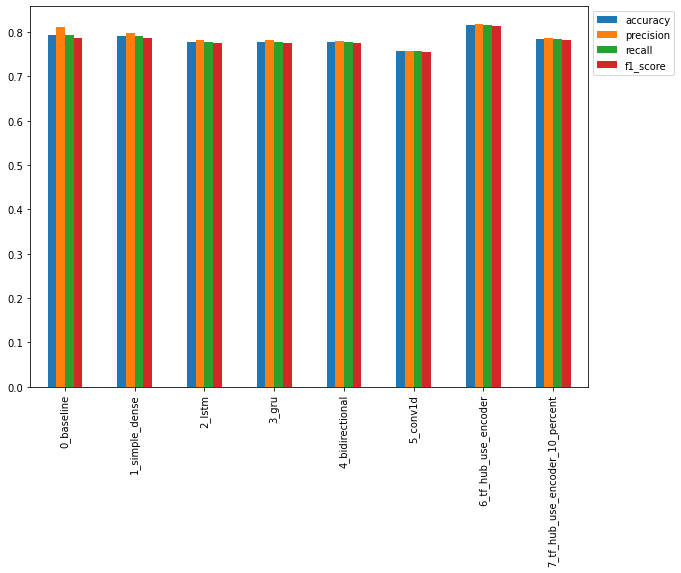

In [114]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

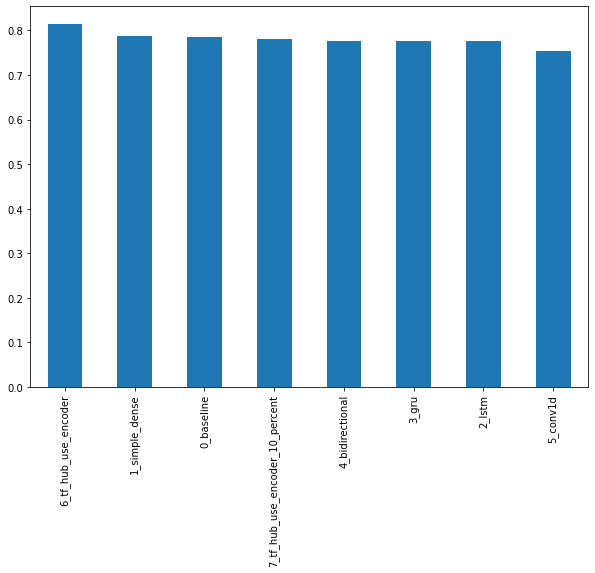

In [115]:
# Sort model results by f1-score
all_model_results.sort_values("f1_score", ascending=False)["f1_score"].plot(kind="bar", figsize=(10, 7));

## Uploading our model training logs to TensorBoard.dev

We can further inspect our model's performance using [TensorBoard.dev](https://tensorboard.dev)

In [116]:
# View TensorBoard logs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
    --name "NLP Modelling Experiments" \
    --description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
    --one_shot  # exit the uploader once uploading is finished


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/w0sDf3D9SeSyMG7OiZRgpg/

[2022-06-17T12:15:39] Started scanning logdir.
[2022-06-17T12:15:58] Total uploaded: 570 scalars, 0 tensors, 20 binary objects (10.0 MB)
[2022-06-17T12:15:58] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/w0sDf3D9SeSyMG7OiZRgpg/


View modelling experiments on [TensorBoard.dev](https://tensorboard.dev/experiment/h0RX6KtORvK35ozwPeXERQ/)

> 📖 **Resource:** TenosrBoard is great for quickly tracking experiments  but for larger scale experiments. and a whole bunch of tracking options, check out [Weights & Biases](https://wandb.ai/site)

In [117]:
# See the previous TensorBoard Dev experiments you've run...
# !tensorboard dev list

In [118]:
# If you need to delete an experiment from TensorBoard, you can run the following:
# !tensorboard dev delete --experiment_id h0RX6KtORvK35ozwPeXERQ

## Saving and loading a trained model

There are 2 main formats to save a model in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [119]:
# Save TF Hub Sentence Encoder model tp HDF5 format
model_6_dense.save("model_6.h5")

In [122]:
import tensorflow_hub as hub
# Load model with custom Hub Layer (required for HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [123]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4238 - accuracy: 0.8150


[0.4237928092479706, 0.8149606585502625]

In [125]:
model_6_dense_results

{'accuracy': 81.49606299212599,
 'f1_score': 0.8135344618830033,
 'precision': 0.8169586293569981,
 'recall': 0.8149606299212598}

Now let's save to the `SavedModel` format...

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6_dense.save("model_6_SavedModel_format")

In [127]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [128]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.4238 - accuracy: 0.8150


[0.4237928092479706, 0.8149606585502625]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [129]:
# Download a pre-trained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-06-17 12:28:40--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.202.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   106MB/s    in 8.4s    

2022-06-17 12:28:48 (110 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.ind

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [132]:
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 19ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [133]:
# Make predictions with the loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]   # these should be in label format

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [135]:
# Create DataFrame with validation sentences, validation labels and best performing model predictions labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [136]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong.head(10) # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [137]:
most_wrong.tail()   # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* `0` = not disaster
* `1` = disaster

In [139]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354543447494507
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [141]:
# Check the false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730347871780396
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.055075809359550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.

In [142]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making predictions on the test dataset

In [144]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [147]:
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
    pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))   # our model expects a list as input
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")

Pred: 0, Prob: 0.08563046902418137
Text:
Bo2 had by far the best competitive maps imo hope bo3 is the same #InVahnWeTrust

----

Pred: 0, Prob: 0.11184779554605484
Text:
@WilliamTCooper TY for the follow Go To http://t.co/l9MB2j5pXg BRUTALLY ABUSED+DESOLATE&amp;LOST + HER LOVELY MUM DIES..Is it Murder? Pls RT

----

Pred: 0, Prob: 0.12189492583274841
Text:
@DukeSkywalker @facialabuse you should do a competetion between @xxxmrbootleg &amp; #ClaudioMeloni (ultimate throat penetrator) to a wreck off.

----

Pred: 0, Prob: 0.27529388666152954
Text:
Storm &amp; Family tonight http://t.co/0aP7MoNtjF

----

Pred: 0, Prob: 0.14319543540477753
Text:
To treat his childhood asthma Teddy Roosevelt's parents made him drink black coffee and smoke cigars. http://t.co/CtaC2xZ8dY

----

Pred: 0, Prob: 0.26180049777030945
Text:
Slayer at Rockstar Mayhem Festival #slayer #metal #concertphotography #houston #livemusic #canonÛ_ https://t.co/5FrWySzwrs

----

Pred: 1, Prob: 0.5039718151092529
Text:
This ti

## Predicting on Tweets from the wild!

Go to your favourite Twitter account and copy one of their latest tweets.

Then pass that tweet through our trained model.

Is that tweet a disaster or not disaster (according to the model)? 

Is the model right? Or wrong?

In [158]:
def predict_disaster_tweet(model, tweet):
    """
    Returns the label that the model
    predicts for the tweet passed to the model
    """
    pred_prob = model.predict([tweet])
    prediction = tf.squeeze(tf.round(pred_prob))
    if prediction == 0:
        print(f"Not Disaster, Prob: {pred_prob[0][0]}")
    else:
        print(f"Disaster!, Prob: {pred_prob[0][0]}")

In [159]:
# A tweet by Elon Musk
tweet_1 = "I’m dressing as a sink on Halloween, as they will have no choice but to let me in"
predict_disaster_tweet(model_6_pretrained, tweet_1)

Not Disaster, Prob: 0.06192925572395325


In [160]:
tweet_2 = "On June 8, #Wildfires broke out in the province of #Malaga, #Spain. \
More than 3,000 people have been evacuated. \
Please,witnesses, contact us! We want to draw the attention of mankind to the \
real problem-#ClimateChange. #climate #EFFIS #fire #ClimateAction \
#ClimateCrisis"

predict_disaster_tweet(model_6_pretrained, tweet_2)

Disaster!, Prob: 0.9842037558555603


In [164]:
tweet_3 = "#Flood inundated hundreds of villages in Sylhet and Rangpur regions in \
#Bangladesh compelling authority to suspend the largest public exam. \
It is the worst flood in last 50 years. \
#ClimateCrisis #ClimateActionNow #flooding #flooded" 

predict_disaster_tweet(model_6_pretrained, tweet_3)

Disaster!, Prob: 0.973422110080719


In [163]:
tweet_4 = "The magical listening experience of AirPods with Spatial Audio meets \
Harry Styles’ new album “Harry’s House”. With dynamic head tracking, \
to hear sound all around, you’ll experience Harry Styles like never before"

predict_disaster_tweet(model_6_pretrained, tweet_4)

Not Disaster, Prob: 0.08275711536407471


## The Speed/Score Trade-off

In [165]:
# Let's make a function to measure the time of prediction
import time

def pred_timer(model, samples):
    """
    Times how long a model takes to make predictions on samples.
    """
    start_time = time.perf_counter()    # get start time
    model.predict(samples)              # make predictions
    end_time = time.perf_counter()      # get finish time
    total_time = end_time - start_time  # calculate how long it took to make predictions
    time_per_pred = total_time / len(samples)
    return total_time, time_per_pred

In [166]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                            val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.6192878920010116, 0.000812713769030199)

In [167]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0,
                                                              val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.02545235599973239, 3.3402041994399463e-05)

In [168]:
# Get results for pretrained model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1_score': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

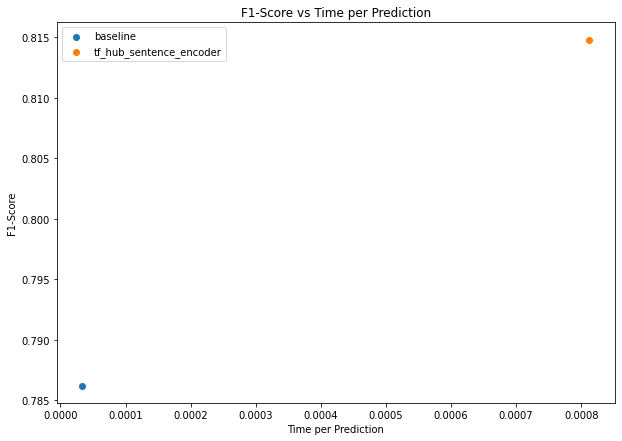

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1_score"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1_score"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title('F1-Score vs Time per Prediction')
plt.xlabel("Time per Prediction")
plt.ylabel("F1-Score");